            0   1    2    3   4        5
0  car9-7.jpg  96  500  137  68  ASV9218


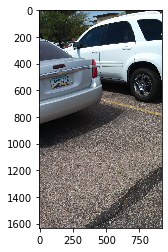

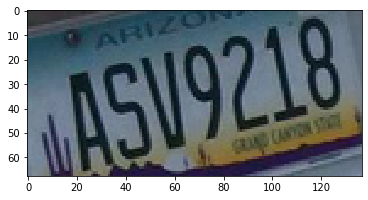

In [2]:
from skimage.io import imread
from skimage.color import rgb2gray
import pandas as pd
import matplotlib.pyplot as plt
import cv2

df = pd.read_csv('data/benchmarks/endtoend/us/car9-7.txt', header=None, sep='\t')
img_x, img_y, img_w, img_h = df.values[0][1], df.values[0][2], df.values[0][3], df.values[0][4]
label = df.values[0][5]

print(df)

img = imread('data/benchmarks/endtoend/us/car9-7.jpg')

img_plate = img[img_y:img_y + img_h, img_x:img_x + img_w]

# print(img_plate)


plt.imshow(img)
plt.show()
plt.imshow(img_plate)
plt.show()

# convert rgb image to grayscale

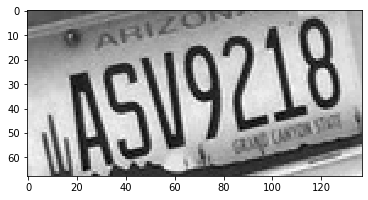

In [7]:
gray = cv2.cvtColor(img_plate, cv2.COLOR_BGR2GRAY) 
plt.imshow(gray, cmap=plt.cm.gray)
plt.show()

# blurring

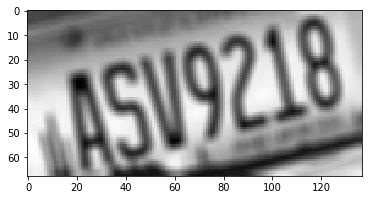

In [4]:
blur = cv2.GaussianBlur(gray, (5, 5), cv2.BORDER_DEFAULT)

plt.imshow(blur, cmap=plt.cm.gray)
plt.show()

# thresholding and invert image: create an image with only black and white pixels

==============Adaptive thresholding====================


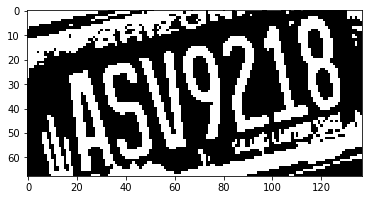

==============OTSU thresholding====================


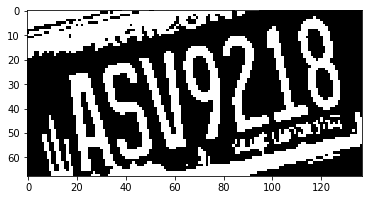

In [8]:
# adaptive thresholding
image_to_thresh = gray
binary_inv_adaptive = cv2.adaptiveThreshold(image_to_thresh, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 39, 1)
# OTSU's thresholding
ret, binary_inv_otsu = cv2.threshold(image_to_thresh, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

print('==============Adaptive thresholding====================')
plt.imshow(binary_inv_adaptive, cmap=plt.cm.gray)
plt.show()

print('==============OTSU thresholding====================')
plt.imshow(binary_inv_otsu, cmap=plt.cm.gray)
plt.show()

# find contour

(68, 137)


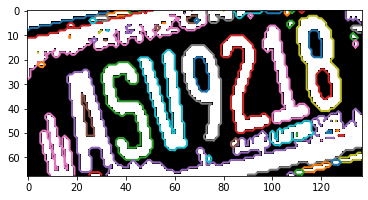

hi:54.400000000000006, lo:6.800000000000001
w_:17, h_:38
Y_center:21.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[  0   0   0   0   0   0   0   0   0   0   0  27 127 127   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


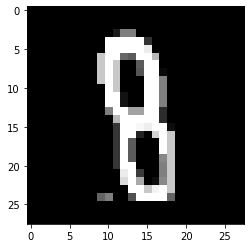

w_:18, h_:39
Y_center:25.5
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[  0   0   0   0   0   0   0   0   0   0 139 159   0   0   0  35   0 171
 255   0   0   0   0   0   0   0   0   0]


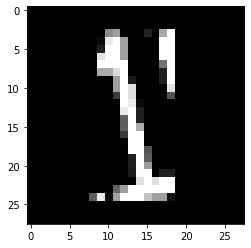

w_:19, h_:39
Y_center:29.5
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[  0   0   0   0   0   0   0   0   0   0   0 159 159 159  19   0   0   0
   0   0   0   0   0   0   0   0   0   0]


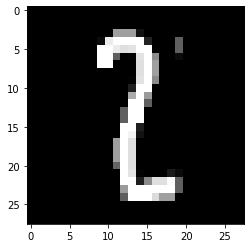

w_:15, h_:38
Y_center:33.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[  0   0   0   0   0   0   0   0   0   0   0  27 127 127 127   0   0   0
   0   0   0   0   0   0   0   0   0   0]


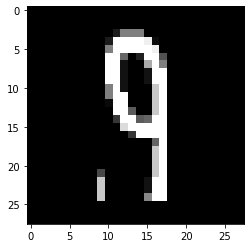

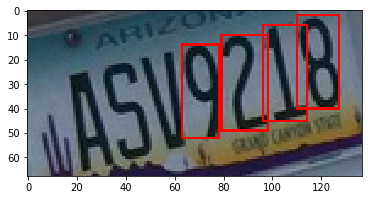

In [10]:
from skimage import measure
from skimage.draw import polygon_perimeter
from skimage.transform import resize
import cv2
import numpy as np

def find_digits(image):
    print(image.shape)

    contours = measure.find_contours(image, 0.8)
    fig, ax = plt.subplots()
    ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
    for n, contour in enumerate(contours):
        ax.plot(contours[n][:, 1], contours[n][:, 0], linewidth=2)
    plt.show()

    h = image.shape[0]
    w = image.shape[1]
    area = w * h

    low = 0.02
    up = 0.08
    min_area = area * low
    max_area = area * up
    w_h_ratio = 0.2
    bbox_center_lo = 0.1 * h
    bbox_center_hi = 0.8 * h
    resize_padding = 5

    print("hi:{}, lo:{}".format(bbox_center_hi, bbox_center_lo))

    with_boxes  = np.copy(img_plate)

    digits_cropped = []

    for n, contour in enumerate(contours):
        Ymin = int(np.min(contour[:,0]))
        Ymax = int(np.max(contour[:,0]))
        Xmin = int(np.min(contour[:,1]))
        Xmax = int(np.max(contour[:,1]))
    #     print(Xmin)
        w_ = Xmax - Xmin
        h_ = Ymax - Ymin    
        area_ = w_ * h_
        Y_center = (Ymin + Ymax) / 2 

        # we set three evaluation criteria to filter out contours that are not digits
        # 1: min_area < area size < max_area
        # 2: width and height ratio > w_h_ratio
        # 3: bbox_center_lo < center point < bbox_center_hi
        if(area_ > min_area and area_ < max_area and 
           w_/h_ > w_h_ratio and h_/w_ > w_h_ratio and 
           Y_center > bbox_center_lo and Y_center < bbox_center_hi):

            print('w_:{}, h_:{}'.format(w_, h_))
            print('Y_center:{}'.format(Y_center))

            r = [Ymin, Ymax, Ymax, Ymin, Ymin]
            c = [Xmax, Xmax, Xmin, Xmin, Xmax]
            rr, cc = polygon_perimeter(r, c, with_boxes.shape)
            with_boxes[rr, cc] = [255,0,0]

            digit = image[Ymin:Ymax, Xmin:Xmax]

#             digit = util.invert(digit)

            # make digit to a squared matrix
            # In case height superior than width
            if h_ > w_:
                diff = h_-w_
                if diff % 2 == 0:
                    x1 = np.zeros(shape=(h_, diff//2))
                    x2 = x1
                else:
                    x1 = np.zeros(shape=(h_, diff//2))
                    x2 = np.zeros(shape=(h_, (diff//2)+1))

                digit = np.concatenate((x1, digit, x2), axis=1)

            # In case height inferior than width
            if h_ < w_:
                diff = w_-h_
                if diff % 2 == 0:
                    x1 = np.zeros(shape=(diff//2, w_))
                    x2 = x1
                else:
                    x1 = np.zeros(shape=(diff//2, w_))
                    x2 = np.zeros(shape=((diff//2)+1, w_))
                print(digit.shape, x1.shape, x2.shape)
                digit = np.concatenate((x1, digit, x2), axis=0)

            # put paddings around the digit
            digit = np.pad(digit, ((resize_padding, resize_padding),(resize_padding, resize_padding)), 'constant')

            print(digit[3])
            digit = cv2.resize(digit, (28,28))
            digit = digit.astype('uint8')
            print(digit[3])

            plt.imshow(digit, cmap=plt.cm.gray)
            plt.show()

            digits_cropped.append([digit])

    plt.imshow(with_boxes, interpolation='nearest', cmap=plt.cm.gray)
    plt.show()
    return digits_cropped
    

digits_cropped = find_digits(binary_inv_adaptive)

# prediction

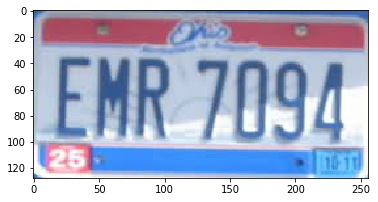

Prediction : E , Precision : 0.9994622
Prediction : M , Precision : 0.3621076
Prediction : R , Precision : 0.9999981
Prediction : 7 , Precision : 0.9997584
Prediction : 0 , Precision : 0.70015574
Prediction : 9 , Precision : 0.99810743
Prediction : 4 , Precision : 0.3826114


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from sklearn.preprocessing import OneHotEncoder

physical_devices = tf.config.experimental.list_physical_devices('GPU') 
for physical_device in physical_devices: 
    tf.config.experimental.set_memory_growth(physical_device, True)

model = load_model('classifier_nor_20.h5')

plt.imshow(img_plate, interpolation='nearest', cmap=plt.cm.gray)
plt.show()

for d in digits_cropped:

    d = np.reshape(d, (1,28,28,1)) 
    out = model.predict(d)
#     print(out)
    
    p = []
    precision = 0
    for i in range(len(out)):
        z = np.zeros(36)
        z[np.argmax(out[i])] = 1.
        precision = max(out[i])
        p.append(z)
    prediction = np.array(p)

    # Inverse one hot encoding
    letters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    classes = []
    for a in letters:
        classes.append([a])
    ohe = OneHotEncoder(handle_unknown='ignore', categorical_features=None)
    ohe.fit(classes)
    pred = ohe.inverse_transform(prediction)

    if precision > 0.1:
        print('Prediction : ' + str(pred[0][0]) + ' , Precision : ' + str(precision))